UCI Seed Data Analysis
seed_dataset.csv consists of seven attributes of wheat seed from 3 differennt types:
Kama, Rosa and Canadian
Attributes are:

area A, perimeter P, compactness C = 4*pi*A/P^2, length of kernel, width of kernel, asymmetry coefficient, length of kernel groove.

Source: 'archive ics uci edu/ml/datasets/seeds#'

Classification trial to compare Random Forest to SVC on the dataset


In [4]:
# import dataset
import pandas as pd
df = pd.read_csv('seed_dataset.csv')
df.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry Coefficient,Length of Kernel Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
# Split dataframe into X with 7 attributes and y as Type
X = df.drop('Type', axis = 1)
y = df.Type

In [6]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [7]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
#Fit and model using Random Forest
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(n_estimators=15, criterion='entropy', random_state = 0)
modelRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
# Report predictions and accuracy
y_predRF = modelRF.predict(X_test)
print('Random Forest score: ', modelRF.score(X_test, y_test))

Random Forest score:  0.9433962264150944


In [33]:
#Fit and model using SVC
from sklearn.svm import SVC   
modelSVC = SVC(kernel ='linear', gamma='scale', random_state = 0)
modelSVC.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
#Report predictions and SVC accuracy
y_predSVC = modelSVC.predict(X_test)
print('SVC score: ', modelSVC.score(X_test, y_test)) 

SVC score:  0.9433962264150944


In [35]:
#Print Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrixRF = confusion_matrix(y_test, y_predRF)
print('Random Forest cm: \n', confusion_matrixRF)
print(classification_report(y_test, y_predRF))

Random Forest cm: 
 [[16  0  1]
 [ 2 19  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        17
           2       1.00      0.90      0.95        21
           3       0.94      1.00      0.97        15

   micro avg       0.94      0.94      0.94        53
   macro avg       0.94      0.95      0.94        53
weighted avg       0.95      0.94      0.94        53



In [36]:
#Print SVC Confusion Matrix
confusion_matrixSVC = confusion_matrix(y_test, y_predSVC)
print('SVC cm: \n', confusion_matrixSVC)
print(classification_report(y_test, y_predSVC))

SVC cm: 
 [[16  0  1]
 [ 2 19  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        17
           2       1.00      0.90      0.95        21
           3       0.94      1.00      0.97        15

   micro avg       0.94      0.94      0.94        53
   macro avg       0.94      0.95      0.94        53
weighted avg       0.95      0.94      0.94        53



SVC Heatmap: 

AxesSubplot(0.125,0.125;0.62x0.755)


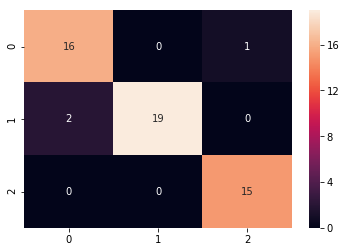

In [37]:
#Plot Seaborn Heatmap
import seaborn as sns
print('SVC Heatmap: \n')    
print(sns.heatmap(confusion_matrixSVC, annot=True))